<a href="https://colab.research.google.com/github/ashwin-r-k/learning_ML/blob/master/mlfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
 !wget https://raw.githubusercontent.com/ashwin-r-k/learning_ML/master/magic04.data

--2023-12-22 04:32:41--  https://raw.githubusercontent.com/ashwin-r-k/learning_ML/master/magic04.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [text/plain]
Saving to: ‘magic04.data’

magic04.data        100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2023-12-22 04:32:41 (53.7 MB/s) - ‘magic04.data’ saved [1477391/1477391]



In [4]:
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["fLength","fWidth","fSize", "fConc", "fConcl", "fAsym", "fMllong", "fX3Trans", "fAlpha",  "fDist", "class"]
df = pd.read_csv("magic04.data",names=cols)

In [6]:
df["class"] = (df["class"]=="g").astype(int)

In [7]:
print(df)

        fLength    fWidth   fSize   fConc  fConcl     fAsym   fMllong  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fX3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610 

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fMllong,fX3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


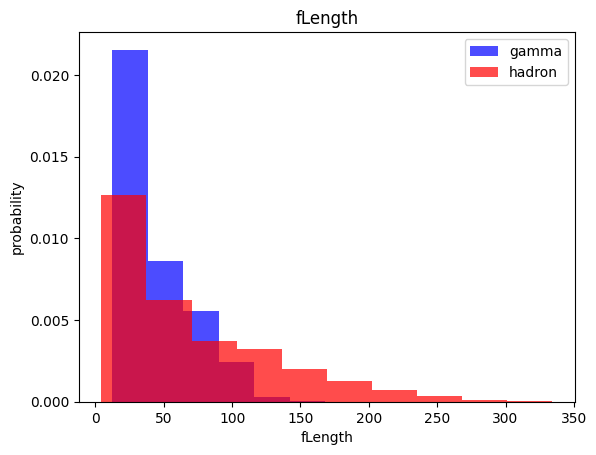

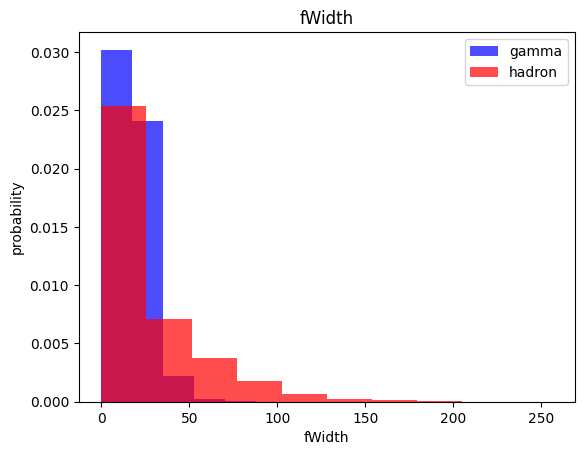

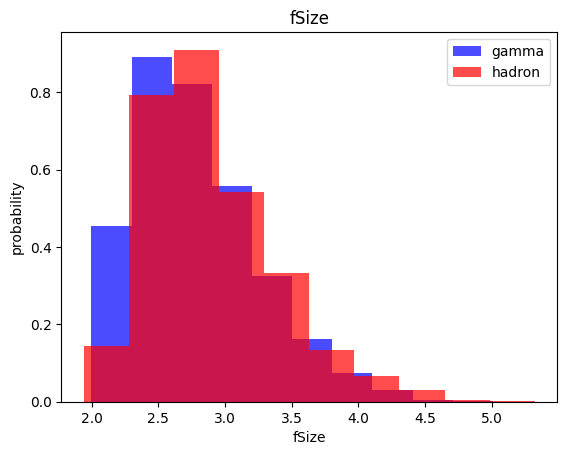

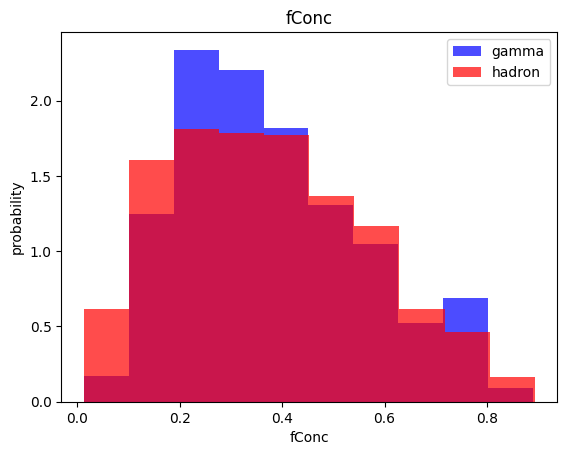

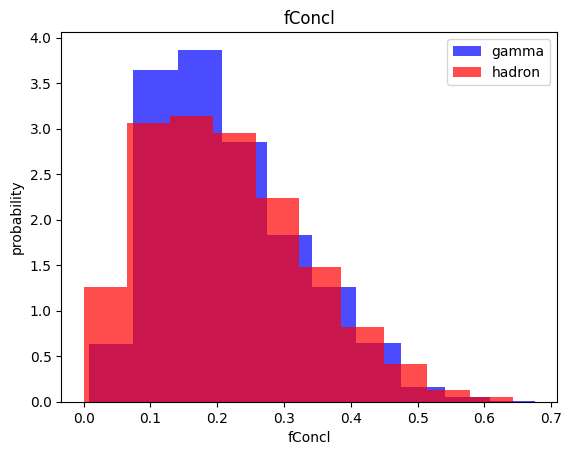

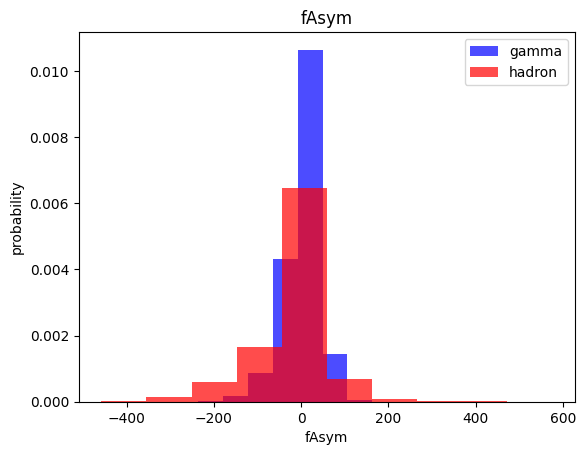

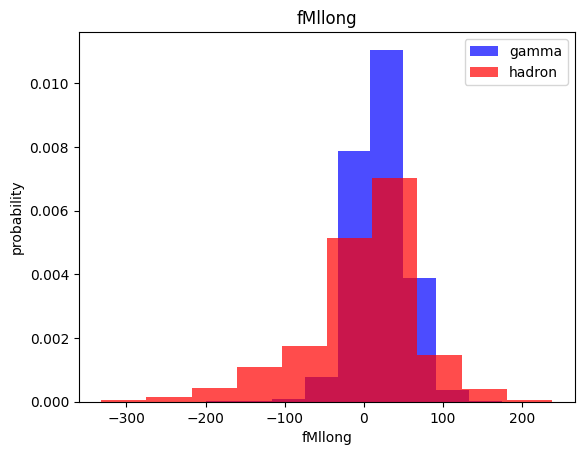

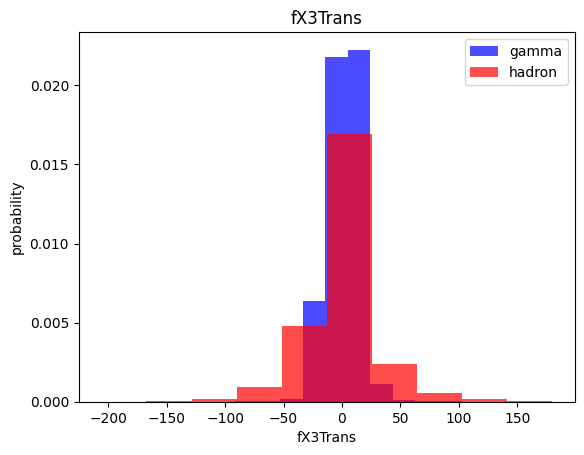

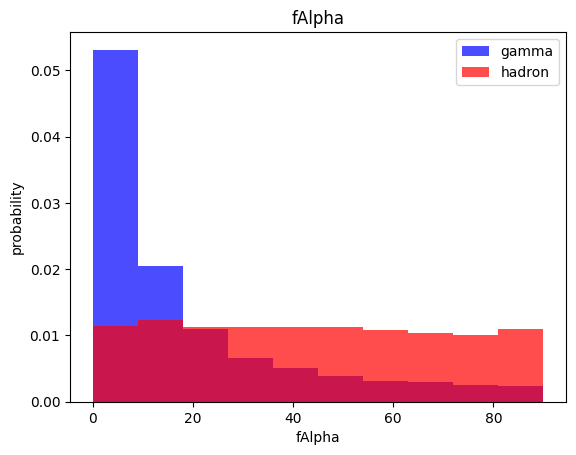

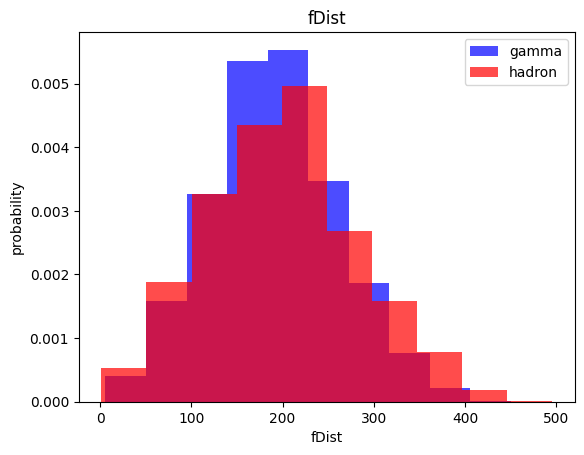

In [ ]:
for label in cols[:-1]:
    plt.hist( df[ df["class"]==1 ][label], color="blue" , label="gamma" , alpha = 0.7,density=True  )
    plt.hist( df[ df["class"]==0 ][label], color="red" , label="hadron" , alpha = 0.7,density=True  )
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("probability")
    plt.legend()
    plt.show()

# Train, valiition , Test data set.


In [8]:
train, valid, test = np.split( df.sample(frac=1) , [int(0.6*len(df)), int(0.8*len(df)) ] )

In [ ]:
# how we have to scale the data to get propper result else it will beprint( not accurete predication
print(train)

        fLength   fWidth   fSize   fConc  fConcl     fAsym   fMllong  \
13755   42.0985  12.1855  2.8162  0.3328  0.1763   -7.5451   22.8265   
12841   20.3377  16.3027  2.5164  0.5172  0.3024    1.3912  -10.0307   
7742   101.5520  40.4720  4.0642  0.1061  0.0554   80.5110   68.9832   
7759    73.0376  22.2678  3.4429  0.1745  0.0932   72.6734   63.8847   
17882  154.9610  96.2104  4.3957  0.0560  0.0293 -176.6750 -149.6370   
...         ...      ...     ...     ...     ...       ...       ...   
13727   14.0343   8.5698  2.4040  0.8757  0.4477   14.7287    4.5391   
6673    16.5548  11.2689  2.2480  0.5989  0.3814    0.8921   -4.3425   
16382   48.5277  11.9390  2.7705  0.3155  0.1654   -4.1113   16.1417   
5934    24.3134  16.6080  2.4354  0.3376  0.1817   -9.9913   -5.1129   
8405    18.7017   9.7132  2.3304  0.6402  0.4136  -19.5508  -13.8690   

       fX3Trans   fAlpha     fDist  class  
13755   -8.9577  57.0152  150.5190      0  
12841    4.1745   8.9192  232.5213      0  
774

In [10]:
def scaledataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(X)

    if oversample:
      ros = RandomOverSampler()
      X, y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y,(-1,1) )))
        #-1 means the len(y)
    return data, X, y

In [11]:
print(len(train [ train["class"] == 1])) # Gamas
print(len(train [ train["class"] == 0])) #Hadrons

# So now we have to over sample the data as the numbers of Hadron data is very less

7425
3987


In [12]:
train, X_train, y_train = scaledataset(train,oversample=True)
test, x_test, y_test = scaledataset(test,oversample=False)
valid, x_valid, y_valid = scaledataset(valid,oversample=False)

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:

y_predict = knn_model.predict(x_test)


In [ ]:
y_predict

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predict = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.44      0.54      1342
           1       0.75      0.91      0.82      2462

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.74      0.74      0.72      3804



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
%%time
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

CPU times: user 9.59 s, sys: 335 ms, total: 9.92 s
Wall time: 11.2 s


In [ ]:
Y_predict = svm_model.predict(x_test)

In [ ]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1342
           1       0.86      0.86      0.86      2462

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Neural Network

In [13]:
import tensorflow as tf

In [14]:

def plot_loss_accuracy(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

    ax1.plot(history.history['loss'],label='loss' )
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_ylabel('Binary crossentropy')
    ax1.set_xlabel('Epoch')


    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')

    ax1.legend()
    ax1.grid(True)
    ax2.legend()
    ax2.grid(True)

    plt.show()

In [15]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
%%time
history = nn_model.fit(
    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
371/371 [==============================] - 3s 7ms/step - loss: 0.4551 - accuracy: 0.7895 - val_loss: 1.2834 - val_accuracy: 0.4190
Epoch 2/100
371/371 [==============================] - 3s 8ms/step - loss: 0.4485 - accuracy: 0.7947 - val_loss: 0.5041 - val_accuracy: 0.7397
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.4408 - accuracy: 0.7964 - val_loss: 0.5394 - val_accuracy: 0.7184
Epoch 4/100
371/371 [==============================] - 2s 4ms/step - loss: 0.4336 - accuracy: 0.8028 - val_loss: 0.8590 - val_accuracy: 0.5233
Epoch 5/100
371/371 [==============================] - 2s 4ms/step - loss: 0.4363 - accuracy: 0.8015 - val_loss: 1.4258 - val_accuracy: 0.3815
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.7943 - val_loss: 0.5413 - val_accuracy: 0.7137
Epoch 7/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.7952 - val_loss: 1.1833 - val_accuracy: 0.4521

In [1]:
plot_loss_accuracy(history)

NameError: ignored

In [1]:
from tqdm.keras import TqdmCallback
def trainmodel(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation="sigmoid")

    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=['accuracy'] )

    history = nn_model.fit(
        X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0, callbacks=[TqdmCallback(verbose=1)]
    )
    return nn_model, history


In [2]:
%%time
epochs=10
num_nodes,dropout_prob,lr,batch_size = 32,0.1,0.01,32
model, history = trainmodel(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
plot_loss_accuracy(history)

NameError: ignored

In [21]:
from tqdm import tqdm

In [ ]:
%%time
least_val_loss = float('inf')
least_nn_model = None

epochs=5

for num_nodes in  [8,16,32]:
    for dropout_prob in [0 , 0.2]:
        for lr in  [0.01, 0.005, 0.001]:
            for batch_size in [32, 64]:
                print(f'Batch size: {batch_size} , lr: {lr}, dropout prob: {dropout_prob}, numnode: {num_nodes} ')
                model, history = trainmodel(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                #plot_loss_accuracy(history)

                val_loss = model.evaluate(x_valid,y_valid )[0]
                if val_loss < least_val_loss:
                    least_val_loss=val_loss
                    least_nn_model=model








119/119 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7829


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7861b0d567a0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


119/119 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7831
